In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_filtered = pd.read_csv('../Intermediate_data/filtered_movies_genre.csv',index_col= 0)

In [3]:
movies_filtered.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,1626,Fire Down Below (1997),1997-09-05,Félix Enríquez Alcalá,"Steven Seagal, Marg Helgenberger, Stephen Lang...",119123,14289.0,"['Action', 'Drama', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0
1,106491,47 Ronin (2013),2013-12-25,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki, R...",1335975,64686.0,"['Action', 'Adventure', 'Fantasy']",1,1,...,0,0,0,0,0,0,0,0,0,0
2,85414,Source Code (2011),2011-04-01,Duncan Jones,"Jake Gyllenhaal, Michelle Monaghan, Vera Farmi...",945513,45612.0,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Thri...",1,0,...,0,0,0,1,0,1,1,0,0,0
3,124805,Venus & Vegas (2010),2010-11-01,Demian Lichtenstein,"Eddie Kaye Thomas,Donald Faison,Eddie Guerra,J...",423474,68716.0,"['Action', 'Comedy']",1,0,...,0,0,0,0,0,0,0,0,0,0
4,144514,Quick (2011),2011-07-21,Beom-gu Cho,"Yoo Seung-Mok,Yoon Je-moon,Kim Tae-woo,Lee Min...",2007413,77175.0,"['Action', 'Comedy', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
movies_filtered.shape

(22351, 28)

In [20]:
len(movies_filtered['movieId'].unique())

22351

In [5]:
train_subset  = pd.read_csv('../Intermediate_data/train_subset.csv', index_col= 0)

In [7]:
train_subset.head()

,userId,movieId,rating,timestamp,year
25352,127137,115824,4.5,2017-12-31 23:59:50,2017
25353,142748,2762,5.0,2017-12-31 23:59:41,2017
25354,196198,1198,3.5,2017-12-31 23:59:17,2017
25355,142748,71057,4.5,2017-12-31 23:58:09,2017
25356,142748,152077,5.0,2017-12-31 23:57:32,2017


In [8]:
train_subset = train_subset.reset_index()

In [21]:
train_subset['movieId'].unique() , len(train_subset[''])

(1993188, 6)

In [9]:
train_new = train_subset.merge(movies_filtered, how = 'inner', left_on = 'movieId', right_on = 'movieId' )

In [12]:
train_subset.shape , train_new.shape

((1993188, 6), (1200795, 33))

In [14]:
train_subset.shape[0] - train_new.shape[0]

792393

In [17]:
len(train_subset['movieId'].unique()), len(train_new['movieId'].unique())

(36536, 17035)

In [19]:
len(train_subset['userId'].unique())- len(train_new['userId'].unique())

454

In [117]:
train_new.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0


In [118]:
train_new.shape, train_subset.shape , movies_filtered.shape

((1200795, 33), (1993188, 6), (22351, 28))

In [119]:
len(train_new['movieId'].unique()), len(train_new['userId'].unique())

(17035, 19203)

In [120]:
UM= train_new.pivot(index='userId', columns='movieId', values='rating')
UM_matrix = np.matrix(UM.values)

In [121]:
UM_matrix

matrix([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])

In [122]:
UM_matrix.shape

(19203, 17035)

In [123]:
import CollabFiltering as CF

In [124]:
p,q = CF.SVD(UM_matrix,hiddenk = 20, epoch = 10 )

In [125]:
''' def rmse(p,q,UM, UM_pred):

    UM_pred =  np.dot(p,q.T)
    subt = np.subtract(UM,UM_pred)
    RMSE = np.sqrt(np.square(sub[~np.isnan(sub)]).mean())

    return(RMSE)'''

' def rmse(p,q,UM, UM_pred):\n\n    UM_pred =  np.dot(p,q.T)\n    subt = np.subtract(UM,UM_pred)\n    RMSE = np.sqrt(np.square(sub[~np.isnan(sub)]).mean())\n\n    return(RMSE)'

In [126]:
# RMSE = rmse(p,q,UM_matrix)

### Clustering model on the reduced dimension
Clustering at User level on p matrix

In [127]:
from sklearn.mixture import GaussianMixture as GMM

In [144]:
gmm_fit = GMM(n_components=4).fit(p)

In [145]:
prediction_gmm = gmm_fit.predict(p)
probs = gmm_fit.predict_proba(p)

In [146]:
probs[[0]]

array([[0.00150322, 0.22188261, 0.07645383, 0.70016034]])

In [147]:
user_cluster = pd.DataFrame({'userId': UM.index , 'cluster': prediction_gmm })

In [148]:
user_cluster.head()

,cluster,userId
0,3,100032
1,3,100036
2,3,100053
3,2,100057
4,3,100058


In [149]:
import matplotlib.pyplot as plt 

In [150]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(p)
          for n in n_components]

Text(0.5, 0, 'n_components')

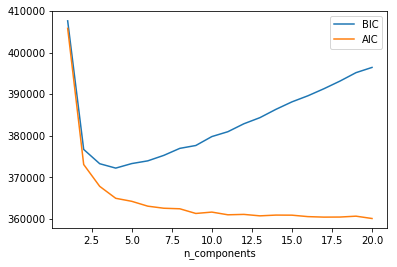

In [151]:
plt.plot(n_components, [m.bic(p) for m in models], label='BIC')
plt.plot(n_components, [m.aic(p) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

---
Merging this data to the training dataset

In [152]:
train_clusters = train_new.merge(user_cluster,how = 'left' , left_on= 'userId', right_on= 'userId')

In [153]:
train_clusters.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan,cluster
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,1
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,1
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3


In [154]:
user_cluster['cluster'].value_counts()

1    9307
3    4288
0    2909
2    2699
Name: cluster, dtype: int64

In [155]:
genres_lst = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

In [156]:
train_clusters.groupby('cluster')[genres_lst].sum().T/user_cluster['cluster'].value_counts()

,0,1,2,3
Action,18.559299,23.446331,32.381252,24.749300
Adventure,16.129254,20.051574,25.704705,20.096082
Animation,5.713647,7.196411,8.828825,6.930970
Children,5.636645,7.081766,8.623564,6.699160
Comedy,16.391200,19.725368,26.086699,18.950560
Crime,9.632520,11.879446,16.090033,12.669543
Documentary,0.557236,0.480821,0.724342,0.384562
Drama,20.605363,25.075212,33.499074,25.021922
Fantasy,8.754899,10.850435,13.727677,10.566698
Film-Noir,0.416294,0.567315,0.894776,0.609375


In [157]:
train_clusters.columns

Index(['index', 'userId', 'movieId', 'rating', 'timestamp', 'year', 'title',
       'releaseDate', 'directedBy', 'starring', 'imdbId', 'tmdbId', 'genres',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'nan', 'cluster'],
      dtype='object')

In [158]:
user_cluster.to_csv('../Intermediate_data/user_clusters.csv')

In [159]:
train_clusters.to_csv('../../data/train_clusters.csv')